In [35]:
#lets first read in the data from the cleaned csv file
import pandas as pd

df = pd.read_csv('insurance_claims_cleaned_fixed.csv')


Claim Circumstances
-------------------
authorities_contacted, police_report_available, 
property_damage, bodily_injuries
→ These can indicate suspicious or unusual claim circumstances.

In [36]:
counts = df.groupby('authorities_contacted')['fraud_reported'].value_counts()
counts

authorities_contacted     fraud_reported
Ambulance                 No                139
                          Yes                57
Fire                      No                163
                          Yes                60
No Authorities Contacted  No                 85
                          Yes                 6
Other                     No                135
                          Yes                63
Police                    No                231
                          Yes                61
Name: count, dtype: int64

Column names in plot_data: ['No', 'Yes']


<Figure size 1000x600 with 0 Axes>

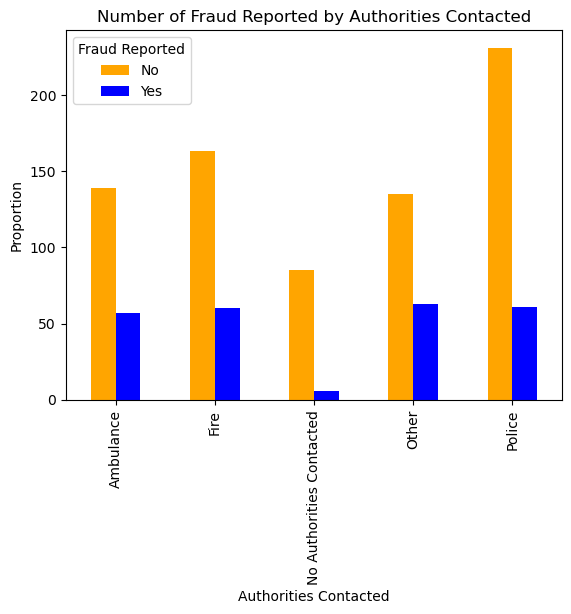

In [37]:
import matplotlib.pyplot as plt

# Print the actual column names to debug color mapping
print("Column names in plot_data:", plot_data.columns.tolist())

# Define custom colors: 'Yes' as blue, 'No' as orange
custom_colors = {'Yes': 'blue', 'No': 'orange', 'Y': 'blue', 'N': 'orange'}  # covers both possible encodings

# Prepare data for plotting
plot_data = counts.unstack() if hasattr(counts, 'unstack') else counts

# Get the order of columns to match colors
col_order = plot_data.columns.tolist()
colors = [custom_colors.get(col, 'gray') for col in col_order]

plt.figure(figsize=(10, 6))
ax = plot_data.plot(kind='bar', stacked=False, color=colors)
plt.xlabel('Authorities Contacted')
plt.ylabel('Proportion')
plt.title('Number of Fraud Reported by Authorities Contacted')
plt.legend(title='Fraud Reported', labels=[col for col in col_order])
plt.show()


Most claims are not fraudulent, regardless of authority. It is not sufficient on its own to predict fraud. 

In [38]:
#Now lets look at police reports and fraud
counts = df.groupby('police_report_available')['fraud_reported'].value_counts()
print(counts)

police_report_available  fraud_reported
No                       No                257
                         Yes                86
Unknown                  No                254
                         Yes                89
Yes                      No                242
                         Yes                72
Name: count, dtype: int64


Column names in plot_data: ['No', 'Yes']


<Figure size 1000x600 with 0 Axes>

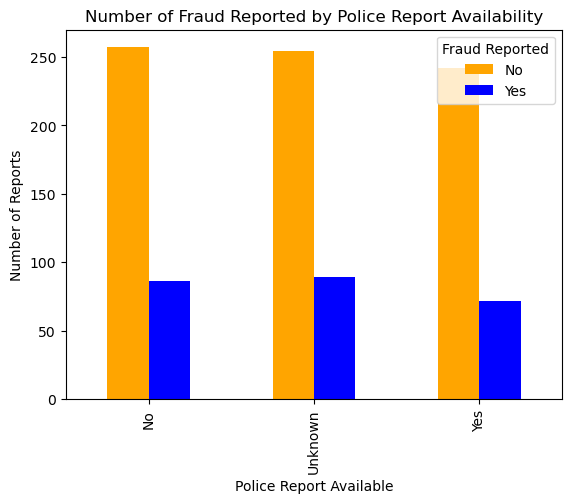

In [39]:
import matplotlib.pyplot as plt

# Print the actual column names to debug color mapping
print("Column names in plot_data:", plot_data.columns.tolist())

# Define custom colors: 'Yes' as blue, 'No' as orange
custom_colors = {'Yes': 'blue', 'No': 'orange', 'Y': 'blue', 'N': 'orange'}  # covers both possible encodings

# Prepare data for plotting
plot_data = counts.unstack() if hasattr(counts, 'unstack') else counts

# Get the order of columns to match colors
col_order = plot_data.columns.tolist()
colors = [custom_colors.get(col, 'gray') for col in col_order]

plt.figure(figsize=(10, 6))
ax = plot_data.plot(kind='bar', stacked=False, color=colors)
plt.xlabel('Police Report Available')
plt.ylabel('Number of Reports')
plt.title('Number of Fraud Reported by Police Report Availability')
plt.legend(title='Fraud Reported', labels=[col for col in col_order])
plt.show()


In [40]:
#now lets take a look at property damage and fraud
counts = df.groupby('property_damage')['fraud_reported'].value_counts()
print(counts)


property_damage  fraud_reported
No               No                272
                 Yes                66
Unknown          No                257
                 Yes               103
Yes              No                224
                 Yes                78
Name: count, dtype: int64


<Figure size 1000x600 with 0 Axes>

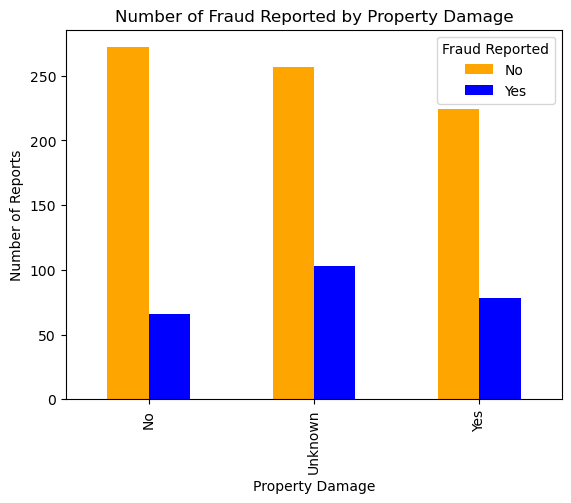

In [41]:
# Define custom colors: 'Yes' as blue, 'No' as orange
custom_colors = {'Yes': 'blue', 'No': 'orange', 'Y': 'blue', 'N': 'orange'}  # covers both possible encodings

# Prepare data for plotting
plot_data = counts.unstack() if hasattr(counts, 'unstack') else counts

# Get the order of columns to match colors
col_order = plot_data.columns.tolist()
colors = [custom_colors.get(col, 'gray') for col in col_order]

plt.figure(figsize=(10, 6))
ax = plot_data.plot(kind='bar', stacked=False, color=colors)
plt.xlabel('Property Damage')
plt.ylabel('Number of Reports')
plt.title('Number of Fraud Reported by Property Damage')
plt.legend(title='Fraud Reported', labels=[col for col in col_order])
plt.show()


The "Unknown" category for property damage is associated with a higher likelihood of fraud, while "No" property damage is associated with a lower likelihood. However, as with authorities contacted, property damage alone is not a perfect predictor—fraud occurs in every group, and most claims in each group are not fraudulent. 

In [43]:
#Finally, lets take a look at bodily injury and fraud
counts = df.groupby('bodily_injuries')['fraud_reported'].value_counts()
print(counts)

bodily_injuries  fraud_reported
0                No                260
                 Yes                80
1                No                251
                 Yes                77
2                No                242
                 Yes                90
Name: count, dtype: int64


Text(0, 0.5, 'Number of Reports')

<Figure size 1000x600 with 0 Axes>

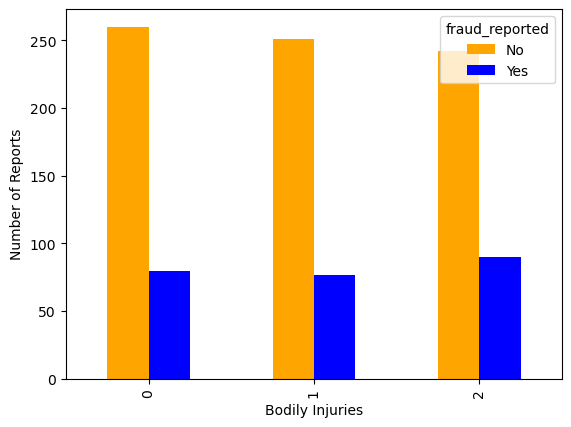

In [46]:
#custom colors
custom_colors = {'Yes': 'blue', 'No': 'orange', 'Y':'blue', 'N': 'orange'}

# Prepare data for plotting
plot_data = counts.unstack() if hasattr(counts, 'unstack') else counts

#Make sure colors match columns
col_order = plot_data.columns.tolist()
colors = [custom_colors.get(col, 'gray') for col in col_order]

plt.figure(figsize=(10,6))
ax = plot_data.plot(kind = 'bar', stacked = False, color = colors)
plt.xlabel('Bodily Injuries')
plt.ylabel('Number of Reports')

A higher number of bodily injuries is associated with a slightly higher likelihood of fraud, but bodily injuries alone are not a strong predictor—fraud occurs in every group, and most claims are not fraudulent regardless of the number of injuries.